In [1]:
import sys
sys.path.append("/Users/david/Documents/code/fhmm/v1")

In [2]:
from importlib import reload
from src.classifiers_davidjames9610.test_a.config import config_location

import importlib
config = importlib.import_module(config_location)
reload(config)
import time

In [7]:
import pickle
import d_classifiers_to_results
reload(d_classifiers_to_results)

sls = pickle.load(open(config.samples_labels,'rb'))
features = pickle.load(open(config.features,'rb'))
classifiers = pickle.load(open(config.classifiers,'rb'))
d_classifiers_to_results.include_buffer_in_features(features, buffer_length=40, buffer_step=20)

  buffering for: lp


Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/whale_data/results/classification/normal' already exists.
For classifier: GaussianHMM
  Testing for: lp


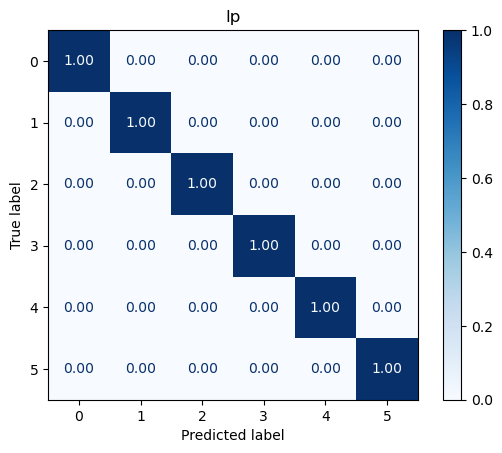

Execution time: 0.437176 seconds
Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/whale_data/results/classification/buffer' already exists.
For classifier: GaussianHMM
  Testing for: lp


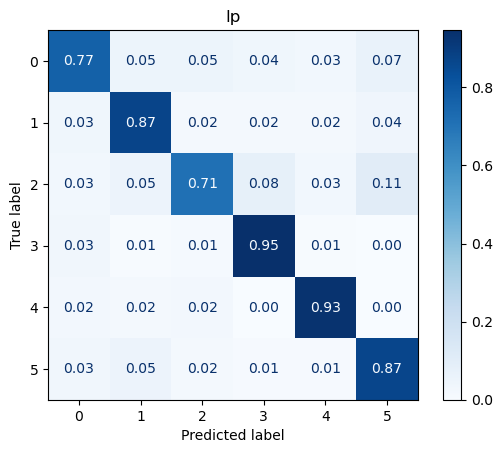

Execution time: 0.934055 seconds


In [9]:
import d_classifiers_to_results
reload(d_classifiers_to_results)

start_time = time.time()

classification_results = d_classifiers_to_results.get_classification_results(
    features, classifiers, sls, config.basedir, plot_cm=True, save_plots=False)

end_time = time.time()
print(f"Execution time: {end_time - start_time:.6f} seconds")

start_time = time.time()

classification_buffer_results = d_classifiers_to_results.get_classification_buff_results(
    features, classifiers, sls, config.basedir, plot_cm=True, save_plots=False)
end_time = time.time()

print(f"Execution time: {end_time - start_time:.6f} seconds")

Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/whale_data/results/classification-valg/normal' created.
For classifier: GaussianHMM
testing for feature type:  lp


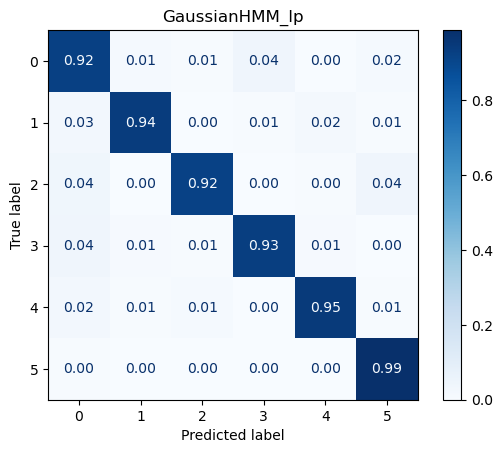

use cm
Execution time: 0.849414 seconds


In [10]:
import d_classifiers_to_results
reload(d_classifiers_to_results)

start_time = time.time()

classification_results_valg = d_classifiers_to_results.get_classification_valg_results(
    features, classifiers, sls, config.basedir, plot_cm=True, save_plots=True)
end_time = time.time()
print(f"Execution time: {end_time - start_time:.6f} seconds")


Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/whale_data/results/classification-valg/buffer/' created.
For classifier: GaussianHMM
testing for feature type:  lp


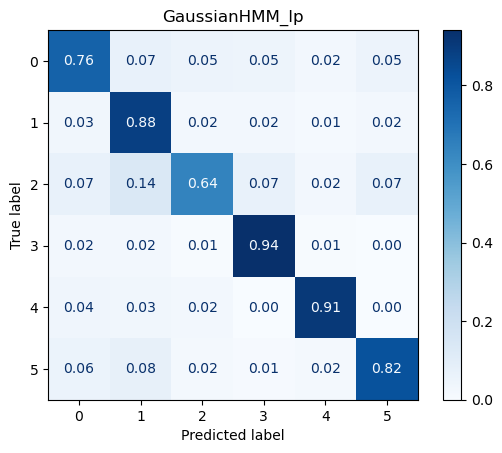

Execution time: 26.768482 seconds


In [11]:
start_time = time.time()

classification_results_valg_buffer = d_classifiers_to_results.get_classification_valg_buffer_results(
    features, classifiers, sls, config.basedir, plot_cm=True, save_plots=True)

end_time = time.time()

print(f"Execution time: {end_time - start_time:.6f} seconds")
# 84 seconds